In [63]:
library(caret)
library(lme4)
library(merTools)
library(gmodels)

In [17]:
load("datos_2500_vehiculos.rda")

In [18]:
summary(datos_def2)

        Manufacturer_commercial Commercial_name         Mass     
 BMW AG             : 360       Length:2586        Min.   : 885  
 DAIMLER AG         : 188       Class :character   1st Qu.:1375  
 FORD WERKE GMBH    : 177       Mode  :character   Median :1565  
 RENAULT            : 144                          Mean   :1611  
 AUTOMOBILES PEUGEOT: 129                          3rd Qu.:1820  
 VOLKSWAGEN         : 116                          Max.   :2780  
 (Other)            :1472                                        
 WLTP_test_mass CO2_Emissions_NEDC CO2_Emissions_WLTP   Wheel_base  
 Min.   : 997   Min.   : 13.0      Min.   :  4.0      Min.   :1589  
 1st Qu.:1514   1st Qu.:114.0      1st Qu.:140.5      1st Qu.:2626  
 Median :1720   Median :131.0      Median :160.0      Median :2700  
 Mean   :1759   Mean   :139.4      Mean   :167.0      Mean   :2758  
 3rd Qu.:1978   3rd Qu.:157.0      3rd Qu.:189.0      3rd Qu.:2864  
 Max.   :2817   Max.   :448.0      Max.   :395.0      Max.

In [19]:
datos_def2 <- datos_def2[!is.na(datos_def2$Engine_capacity) &
                           !is.na(datos_def2$Engine_power) ,]

datos_def2$Fueltype_emission <- as.factor(paste(datos_def2$Fuel_type,
                                                datos_def2$Emissions_reduction_equipe, 
                                                sep = "_"))

save(datos_def2, file = "datos_2500_vehiculos.rda")

In [5]:
summary(datos_def2)

        Manufacturer_commercial Commercial_name         Mass     
 BMW AG             : 360       Length:2586        Min.   : 885  
 DAIMLER AG         : 188       Class :character   1st Qu.:1375  
 FORD WERKE GMBH    : 177       Mode  :character   Median :1565  
 RENAULT            : 144                          Mean   :1611  
 AUTOMOBILES PEUGEOT: 129                          3rd Qu.:1820  
 VOLKSWAGEN         : 116                          Max.   :2780  
 (Other)            :1472                                        
 WLTP_test_mass CO2_Emissions_NEDC CO2_Emissions_WLTP   Wheel_base  
 Min.   : 997   Min.   : 13.0      Min.   :  4.0      Min.   :1589  
 1st Qu.:1514   1st Qu.:114.0      1st Qu.:140.5      1st Qu.:2626  
 Median :1720   Median :131.0      Median :160.0      Median :2700  
 Mean   :1759   Mean   :139.4      Mean   :167.0      Mean   :2758  
 3rd Qu.:1978   3rd Qu.:157.0      3rd Qu.:189.0      3rd Qu.:2864  
 Max.   :2817   Max.   :448.0      Max.   :395.0      Max.

# Formulación de la tarea

La Dirección General de Tráfico se ha planteado (¡por fin!) tener una metodología para clasificar los vehículos en función de sus emisiones, y no (como ahora) simplemente por el año de fabricación y el tipo de combustible. Pero para poder clasificar a un vehículo según aparece en el mercado será necesario disponer de un modelo (de cualquier tipo) que a partir de datos físicos permita establecer cuál es el nivel de emisiones lo más aproximado posible, y clasificar a los vehículos por un valor cuantitativo. Por ejemplo, el percentil de emisiones.

Uno de los gases que emiten los vehículos es el CO2, que es el responsable, en gran medida, de lo que se conoce como "efecto invernadero", que produce el calentamieno del planeta Tierra y que es uno de los causantes principales del cambio climático que se empieza a manifestar de forma preocupante.

Como parte de la homologación de un vehículo se miden estas emisiones, y la Comisión Europea publica un dataset específico para este fenómeno:

https://www.eea.europa.eu/data-and-maps/data/co2-cars-emission-18

Los datos que incluye este dataset son por país. Utilizando los filtros proporcionados se ha seleccionado España. Y además ha sido necesaria una simplificación y alguna manipulación, recogida en este .Rmd

ENTREGA: Por favor, entrega un .Rmd para toda la tarea. Los puntos siguientes son únicamente para presentar (y calificar) por partes esta tarea.

## 1. Modelos de efectos fijos

1. Calcula el mejor modelo de efectos fijos que tenga en cuenta la marca ("Manufacturer_commercial") como factor fijo.

In [12]:
fijos_1 <- lm(CO2_Emissions_NEDC ~ Mass + 
                Wheel_base + 
                Axle_width_1 + Axle_width_2 +
                Engine_capacity + Engine_power,
              data = datos_def2)

summary(fijos_1)


Call:
lm(formula = CO2_Emissions_NEDC ~ Mass + Wheel_base + Axle_width_1 + 
    Axle_width_2 + Engine_capacity + Engine_power, data = datos_def2)

Residuals:
     Min       1Q   Median       3Q      Max 
-174.186  -12.380   -0.157   12.688  177.043 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)     82.8975600 21.5248565   3.851  0.00012 ***
Mass             0.0205320  0.0035245   5.825 6.40e-09 ***
Wheel_base       0.0007354  0.0039975   0.184  0.85405    
Axle_width_1     0.0795509  0.0286655   2.775  0.00556 ** 
Axle_width_2    -0.1039216  0.0259792  -4.000 6.51e-05 ***
Engine_capacity  0.0186840  0.0016048  11.643  < 2e-16 ***
Engine_power     0.1925564  0.0147651  13.041  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 25.91 on 2579 degrees of freedom
Multiple R-squared:  0.5792,	Adjusted R-squared:  0.5782 
F-statistic: 591.6 on 6 and 2579 DF,  p-value: < 2.2e-16


In [13]:
fijos_2 <- lm(CO2_Emissions_NEDC ~ Mass + 
                Wheel_base + 
                Axle_width_1 + Axle_width_2 +
                Engine_capacity + Engine_power +
                Manufacturer_commercial,
              data = datos_def2)

summary(fijos_2)


Call:
lm(formula = CO2_Emissions_NEDC ~ Mass + Wheel_base + Axle_width_1 + 
    Axle_width_2 + Engine_capacity + Engine_power + Manufacturer_commercial, 
    data = datos_def2)

Residuals:
     Min       1Q   Median       3Q      Max 
-167.438  -10.184    0.519   12.136   96.612 

Coefficients:
                                                       Estimate Std. Error
(Intercept)                                           -8.159614  27.404643
Mass                                                   0.011425   0.003796
Wheel_base                                             0.011920   0.004111
Axle_width_1                                           0.025337   0.029294
Axle_width_2                                          -0.011103   0.027548
Engine_capacity                                        0.018010   0.001566
Engine_power                                           0.182444   0.015374
Manufacturer_commercialADIDOR                         45.070022  23.304273
Manufacturer_commercialALPIN

In [14]:
anova(fijos_1, fijos_2)

AIC(fijos_1, fijos_2)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2579,1731933,NA,NA,NA,NA
2,2526,1370460,53,361473.3,12.57093,3.848458e-93


,df,AIC
,<dbl>,<dbl>
fijos_1,8,24181.54
fijos_2,61,23682.18


2. Calcula el mejor modelo de efectos fijos que tenga en cuenta la combinación tipo de combustible y equipo de reducción de emisiones ("Fueltype_emission") 

In [15]:
fijos_3  <- lm(CO2_Emissions_NEDC ~ Mass + 
                Wheel_base + 
                Axle_width_1 + Axle_width_2 +
                Engine_capacity + Engine_power +
                Fueltype_emission,
              data = datos_def2)

summary(fijos_3)


Call:
lm(formula = CO2_Emissions_NEDC ~ Mass + Wheel_base + Axle_width_1 + 
    Axle_width_2 + Engine_capacity + Engine_power + Fueltype_emission, 
    data = datos_def2)

Residuals:
    Min      1Q  Median      3Q     Max 
-88.365  -8.364  -0.832   7.230 169.266 

Coefficients:
                                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)                         -14.984907  18.698466  -0.801 0.422978    
Mass                                  0.061067   0.002536  24.078  < 2e-16 ***
Wheel_base                           -0.004803   0.002729  -1.760 0.078560 .  
Axle_width_1                          0.018703   0.019581   0.955 0.339599    
Axle_width_2                         -0.086241   0.017827  -4.838 1.39e-06 ***
Engine_capacity                       0.016402   0.001172  13.997  < 2e-16 ***
Engine_power                          0.138249   0.011763  11.753  < 2e-16 ***
Fueltype_emissiondiesel_1           116.144140  12.459038   9.322  < 2e-16 ***
Fueltype

In [16]:
anova(fijos_2, fijos_3)
AIC(fijos_2, fijos_3)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2526,1370459.5,NA,NA,NA,NA
2,2502,737234.1,24,633225.5,89.54246,9.168623e-315


,df,AIC
,<dbl>,<dbl>
fijos_2,61,23682.18
fijos_3,85,22126.87


3. Decide cuál de los dos modelos es el mejor y justifica por qué.

## 2. Modelos de efectos aleatorios

Un modelo de efectos fijos que tenga en cuenta conjuntamente la combinación tipo de combustible y equipo de reducción de emisiones ("Fueltype_emission") es inabordable, por la enorme cantidad de parámetros a estimar -si es que finalmente se puede estimar. 

Sin embargo un modelo con efectos aleatorios en la combinación de ambos es abordable. Se trata por tanto de hacer los siguientes modelos de efectos mixtos:

1. Modelo de efectos mixtos con efecto aleatorio de "Fueltype_emission".
2. Modelo de efectos mixtos con efecto aleatorio de "Fueltype_emission" anidado en Manufacturer_commercial
3. Comparar ambos modelos y decidir si el segundo (más complejo) es significativamente mejor que el primero

In [23]:
aleatorios_1  <- lmer(CO2_Emissions_NEDC ~ Mass + 
                Wheel_base + 
                Axle_width_1 + Axle_width_2 +
                Engine_capacity + Engine_power +
                (1 | Fueltype_emission),
              data = datos_def2)

summary(aleatorios_1)

Linear mixed model fit by REML ['lmerMod']
Formula: 
CO2_Emissions_NEDC ~ Mass + Wheel_base + Axle_width_1 + Axle_width_2 +  
    Engine_capacity + Engine_power + (1 | Fueltype_emission)
   Data: datos_def2

REML criterion at convergence: 22299.1

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-5.1104 -0.4882 -0.0505  0.4298  9.8641 

Random effects:
 Groups            Name        Variance Std.Dev.
 Fueltype_emission (Intercept) 691.1    26.29   
 Residual                      294.6    17.16   
Number of obs: 2586, groups:  Fueltype_emission, 78

Fixed effects:
                 Estimate Std. Error t value
(Intercept)     96.402699  15.164503   6.357
Mass             0.059808   0.002526  23.678
Wheel_base      -0.004491   0.002723  -1.649
Axle_width_1     0.019884   0.019536   1.018
Axle_width_2    -0.085156   0.017778  -4.790
Engine_capacity  0.016463   0.001168  14.099
Engine_power     0.139335   0.011719  11.889

Correlation of Fixed Effects:
            (Intr) Mass   Wh

In [24]:
aleatorios_2  <- lmer(CO2_Emissions_NEDC ~ Mass + 
                Wheel_base + 
                Axle_width_1 + Axle_width_2 +
                Engine_capacity + Engine_power +
                (1 | Fueltype_emission:Manufacturer_commercial),
              data = datos_def2)

summary(aleatorios_2)

Linear mixed model fit by REML ['lmerMod']
Formula: 
CO2_Emissions_NEDC ~ Mass + Wheel_base + Axle_width_1 + Axle_width_2 +  
    Engine_capacity + Engine_power + (1 | Fueltype_emission:Manufacturer_commercial)
   Data: datos_def2

REML criterion at convergence: 21833.1

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-6.7884 -0.4835 -0.0379  0.4207  5.9887 

Random effects:
 Groups                                    Name        Variance Std.Dev.
 Fueltype_emission:Manufacturer_commercial (Intercept) 1161.8   34.09   
 Residual                                               176.8   13.30   
Number of obs: 2586, groups:  Fueltype_emission:Manufacturer_commercial, 327

Fixed effects:
                  Estimate Std. Error t value
(Intercept)     123.400077  13.476078   9.157
Mass              0.068484   0.002575  26.591
Wheel_base       -0.005280   0.002538  -2.081
Axle_width_1     -0.006722   0.017883  -0.376
Axle_width_2     -0.073018   0.016798  -4.347
Engine_capacity   0.01

In [25]:
anova(aleatorios_1, aleatorios_2)
AIC(aleatorios_1, aleatorios_2)

refitting model(s) with ML (instead of REML)



,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
aleatorios_1,9,22266.15,22318.87,-11124.08,22248.15,NA,NA,NA
aleatorios_2,9,21798.96,21851.68,-10890.48,21780.96,467.1927,0,NA


,df,AIC
,<dbl>,<dbl>
aleatorios_1,9,22317.08
aleatorios_2,9,21851.15


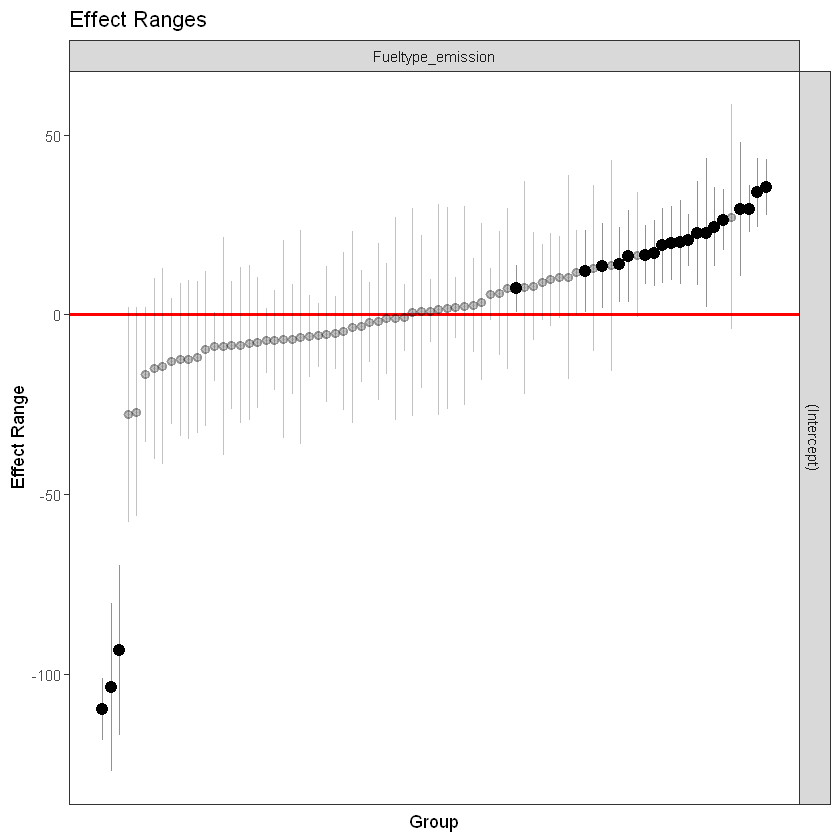

In [32]:
plotREsim(REsim(aleatorios_1))

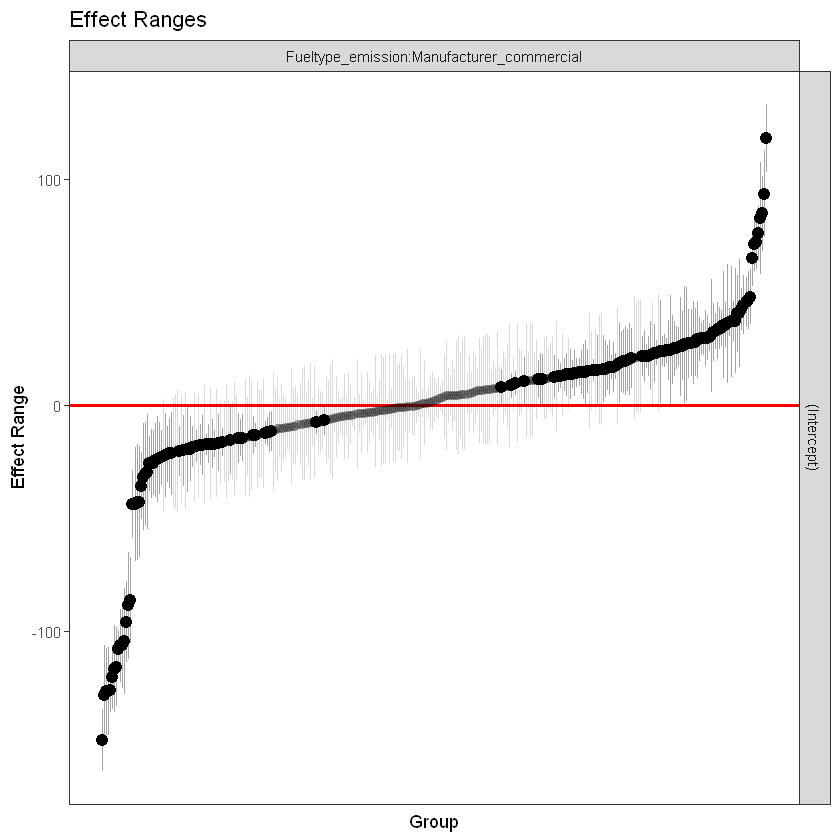

In [33]:
plotREsim(REsim(aleatorios_2))

In [20]:
set.seed(355)
trainIndex <- createDataPartition(datos_def2$CO2_Emissions_NEDC, p = 0.7, list = FALSE)
trainingSet <- datos_def2[trainIndex,]
testSet <- datos_def2[-trainIndex,]

In [4]:
rf <- train(CO2_Emissions_NEDC ~ Mass + 
                Wheel_base + 
                Axle_width_1 + Axle_width_2 +
                Engine_capacity + Engine_power +
                Fueltype_emission, 
                data = trainingSet, method = "rf")
rf

Random Forest 

1813 samples
   7 predictor

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 1813, 1813, 1813, 1813, 1813, 1813, ... 
Resampling results across tuning parameters:

  mtry  RMSE      Rsquared   MAE      
   2    32.66540  0.6539472  22.641368
  42    14.40494  0.8756835   8.734614
  83    14.89683  0.8646229   8.888566

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was mtry = 42.

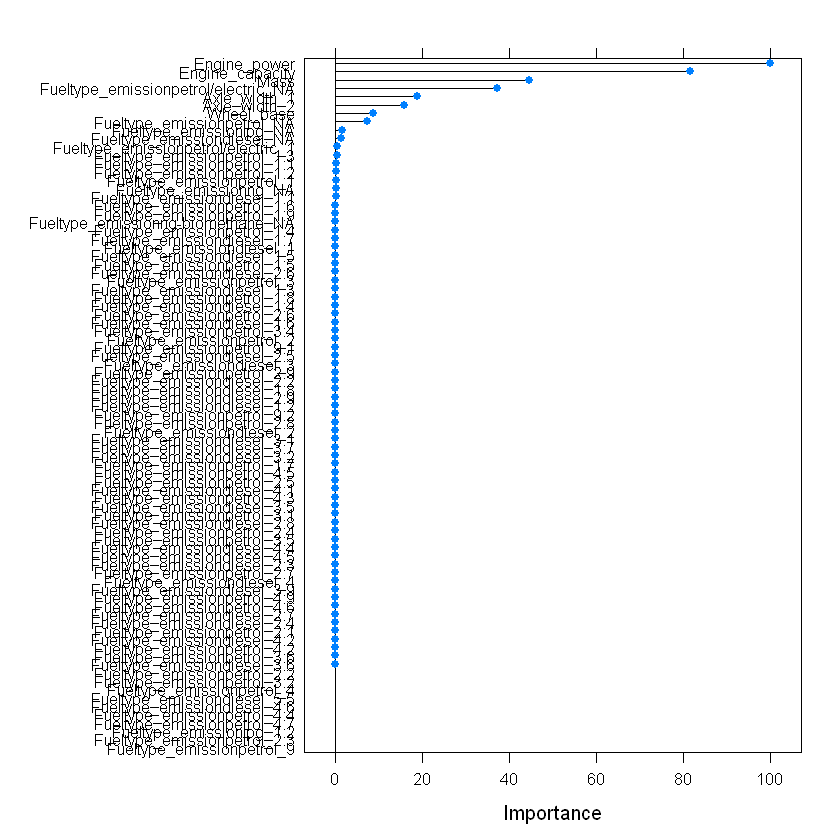

In [5]:
varimp_RF <- varImp(rf)
plot(varimp_RF)

In [26]:
names(testSet) <- names(trainingSet)

In [69]:
fitted <- predict(rf, testSet, na.action = na.pass)
fitted <- round(fitted)
tab <- table(testSet$CO2_Emissions_NEDC, fitted)
tab

     fitted
      43 50 51 53 54 57 59 81 88 92 93 94 95 96 99 100 101 102 103 104 105 106
  40   0  0  1  0  0  0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0
  41   1  0  0  0  0  0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0
  44   0  1  0  0  0  0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0
  46   0  0  0  0  1  0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0
  48   0  1  0  0  0  0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0
  49   0  2  0  1  0  0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0
  54   0  0  0  0  0  1  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0
  55   0  0  0  0  0  0  1  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0
  69   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0
  75   0  0  0  0  0  0  0  1  0  0  0  0  0  0  0   0   0   0   0   0   0   0
  77   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0
  83   0  0  0  0  0  0  0  0  0  0  1  